In [ ]:
###LINEAR  REGRESSION

In [5]:
## File Path 

#Securing path to dataset on Kaggle

import kagglehub

# Download latest version
Fitness_dataset_path = kagglehub.dataset_download("sheemazain/fitness-track-daily-activity-dataset-in-ds")

print("Path to dataset files:", Fitness_dataset_path)

Path to dataset files: C:\Users\framz\.cache\kagglehub\datasets\sheemazain\fitness-track-daily-activity-dataset-in-ds\versions\1


In [6]:
#Extracting file from path, and checking it to star analysis

import os

#Creating Dataset path
Fitness_dataset_path = r"C:\Users\framz\.cache\kagglehub\datasets\sheemazain\fitness-track-daily-activity-dataset-in-ds\versions\1"

#List files to check if dataset exists
print(os.listdir(Fitness_dataset_path))  

['Activity.csv']


In [8]:
## View File and Conduct Initial Analysis

#Viewing first 5 rows of the dataset to have a quick look

import pandas as pd

Fitness_dataset_path = r"C:\Users\framz\.cache\kagglehub\datasets\sheemazain\fitness-track-daily-activity-dataset-in-ds\versions\1\Activity.csv"

Fitnessdf = pd.read_csv(Fitness_dataset_path)

#Show HR datarame header
Fitnessdf.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [9]:
#Summary Statistics
Fitnessdf.describe()

,UserID,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574
std,2.424805e+09,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000
50%,4.445115e+09,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000
75%,6.962181e+09,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000
max,8.877689e+09,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,36019.000000,4900.000000


In [11]:
#Data types of all variables
print(Fitnessdf.dtypes)

UserID                          int64
Date                           object
Total_Distance                float64
Tracker_Distance              float64
Logged_Activities_Distance    float64
Very_Active_Distance          float64
Moderately_Active_Distance    float64
Light_Active_Distance         float64
Sedentary_Active_Distance     float64
Very_Active_Minutes             int64
Fairly_Active_Minutes           int64
Lightly_Active_Minutes          int64
Sedentary_Minutes               int64
Steps                           int64
Calories_Burned                 int64
dtype: object


In [12]:
#List of numerical columns (excluding UserID and Date)
numerical_columns = [
    "Total_Distance", "Tracker_Distance", "Logged_Activities_Distance",
    "Very_Active_Distance", "Moderately_Active_Distance", "Light_Active_Distance",
    "Sedentary_Active_Distance", "Very_Active_Minutes", "Fairly_Active_Minutes",
    "Lightly_Active_Minutes", "Sedentary_Minutes", "Steps", "Calories_Burned"
]

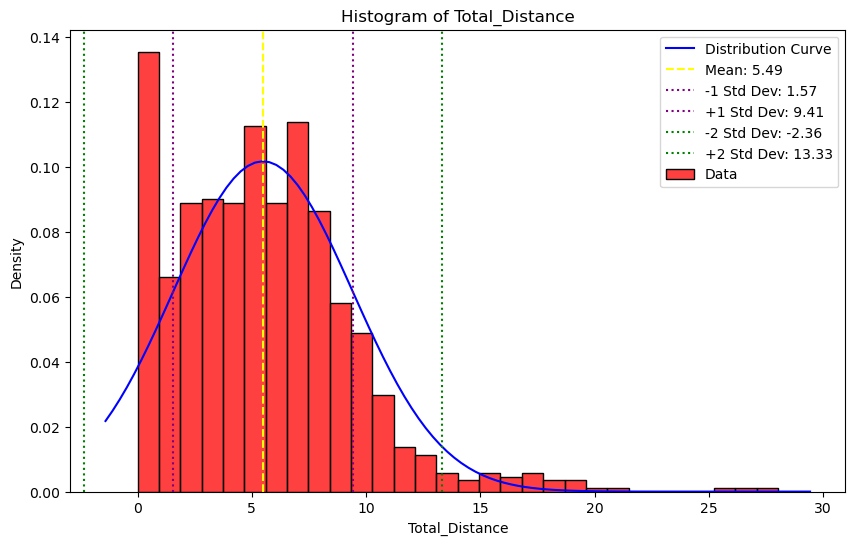

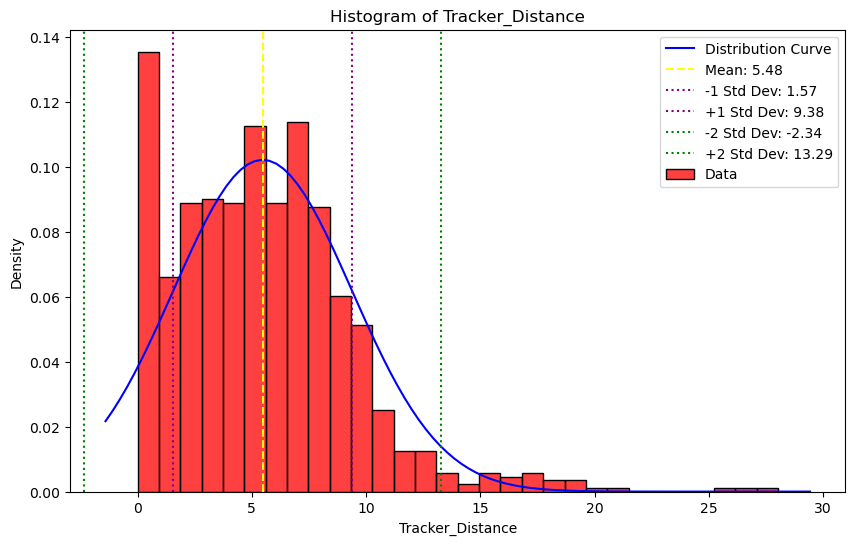

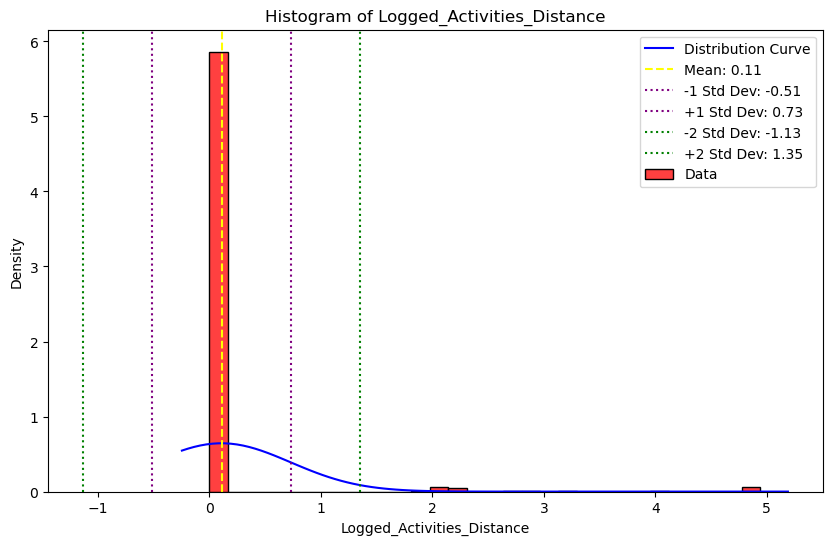

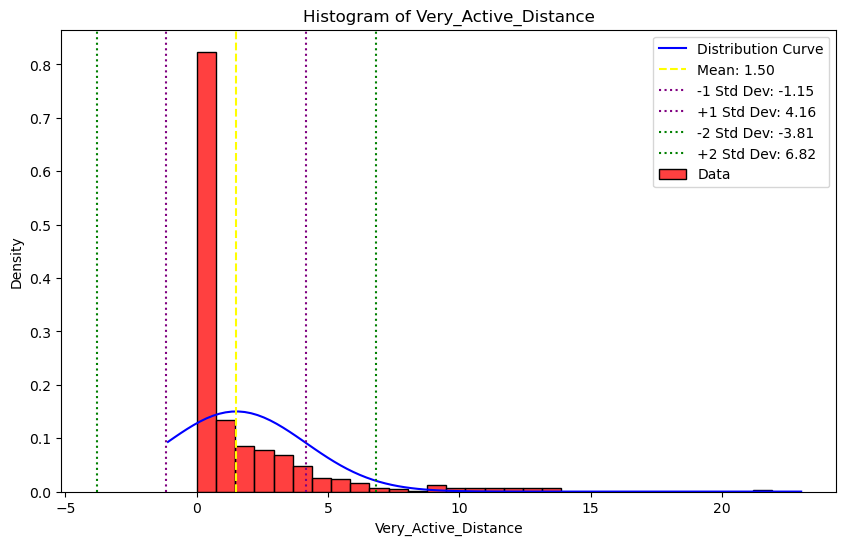

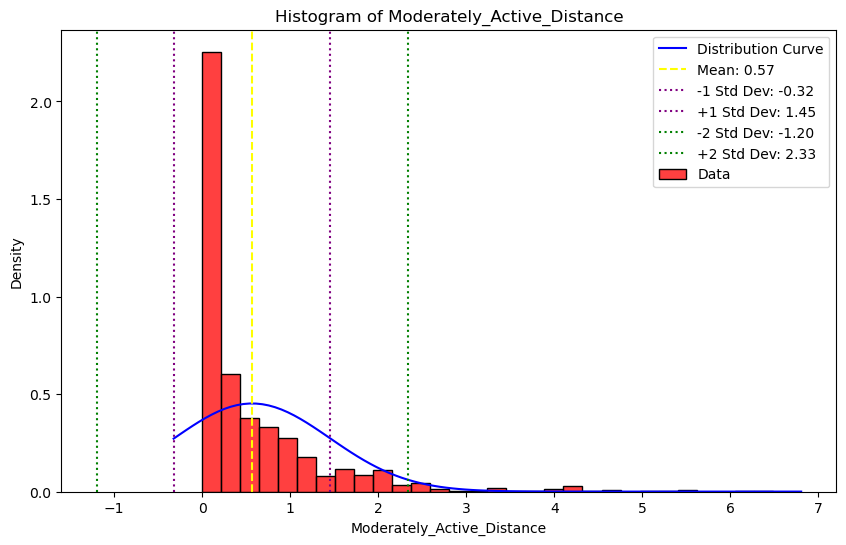

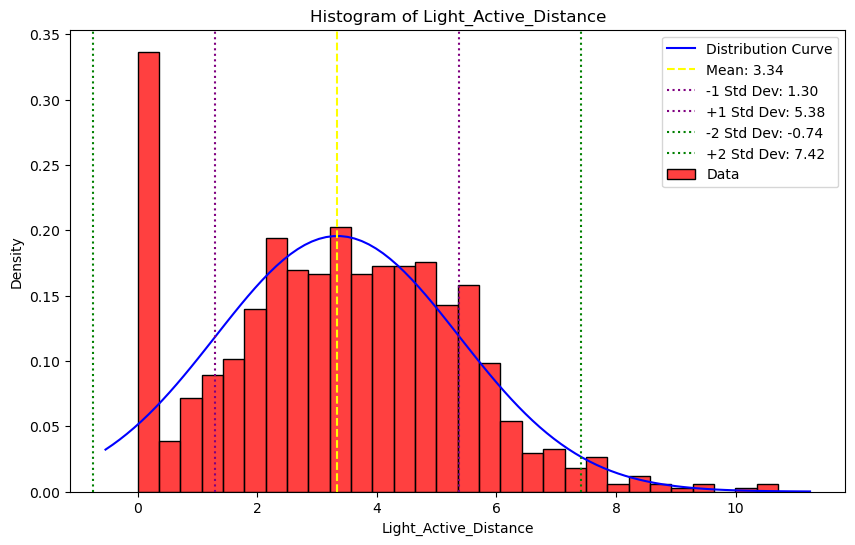

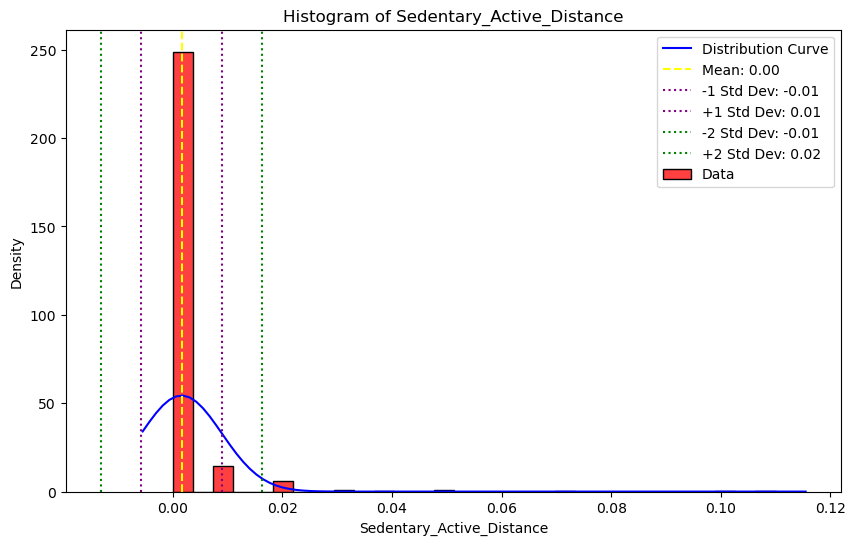

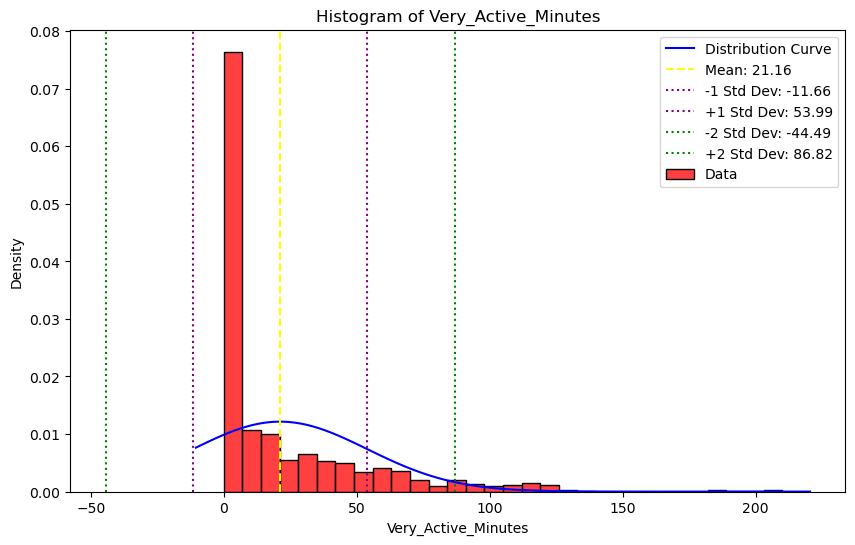

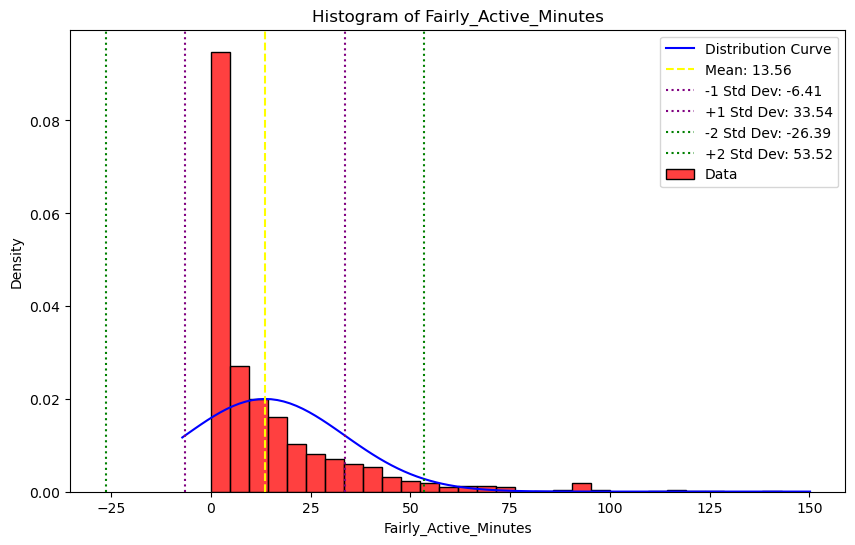

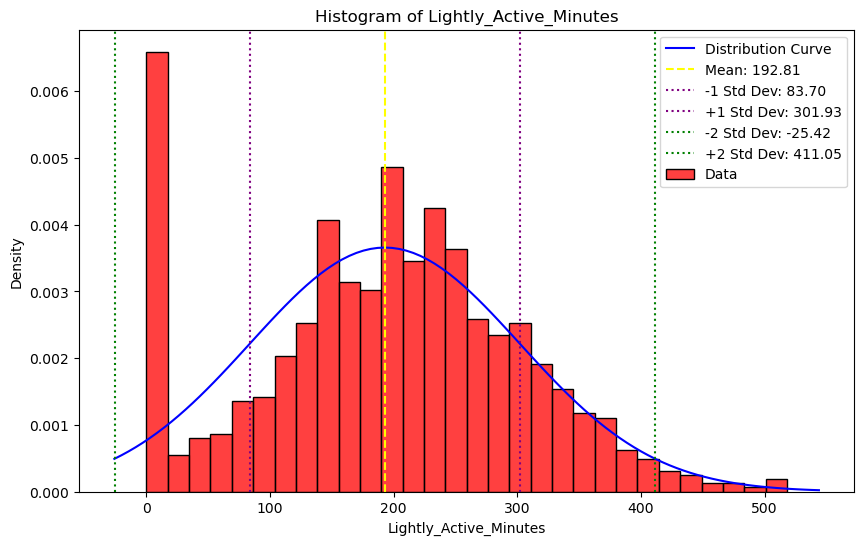

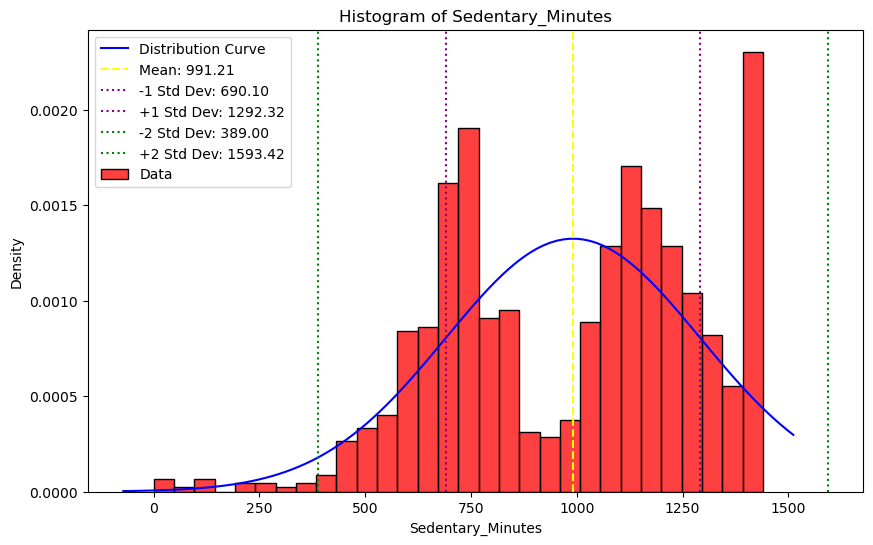

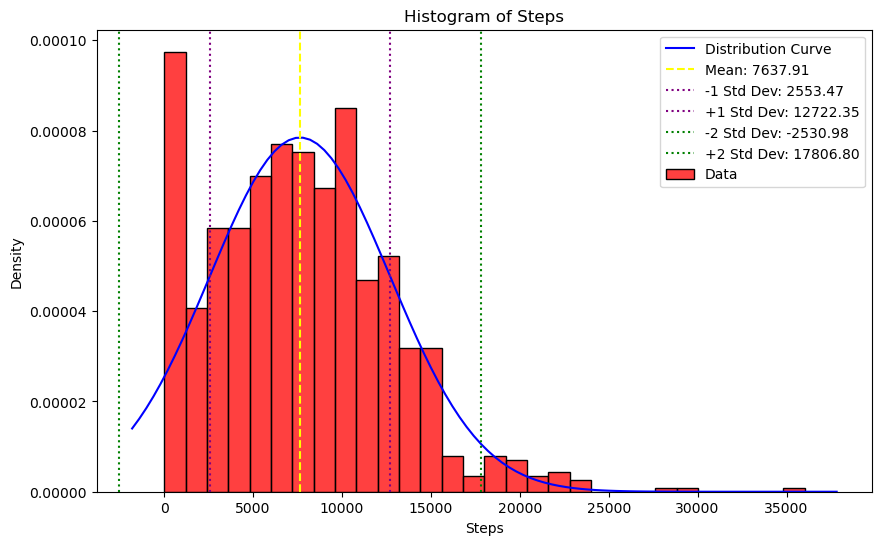

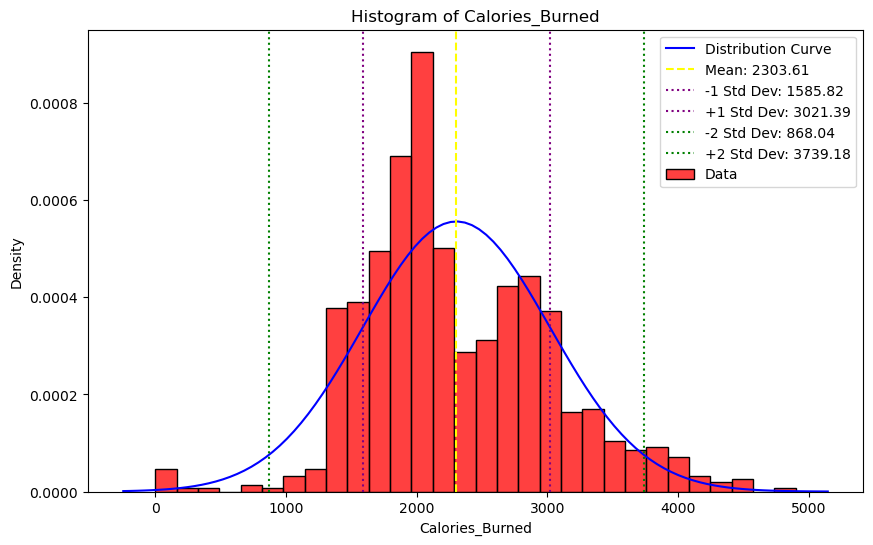

In [14]:
## Create Histograms

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# Loop through each numerical column and generate histogram
for column in numerical_columns:
    Fitnessdf_column = Fitnessdf[column]
    
    # Calculate statistics
    mean = np.mean(Fitnessdf_column)
    std_dev = np.std(Fitnessdf_column)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(Fitnessdf_column, bins=30, kde=False, color='red', stat='density', label='Data')

    # Plot the normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std_dev)
    plt.plot(x, p, 'blue', label='Distribution Curve')

    # Plot the mean line
    plt.axvline(mean, color='yellow', linestyle='--', label=f'Mean: {mean:.2f}')

    # Plot the 1st standard deviation lines
    plt.axvline(mean - std_dev, color='purple', linestyle=':', label=f'-1 Std Dev: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='purple', linestyle=':', label=f'+1 Std Dev: {mean + std_dev:.2f}')

    # Plot the 2nd standard deviation lines
    plt.axvline(mean - 2*std_dev, color='green', linestyle=':', label=f'-2 Std Dev: {mean - 2*std_dev:.2f}')
    plt.axvline(mean + 2*std_dev, color='green', linestyle=':', label=f'+2 Std Dev: {mean + 2*std_dev:.2f}')

    # Add labels and title
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()


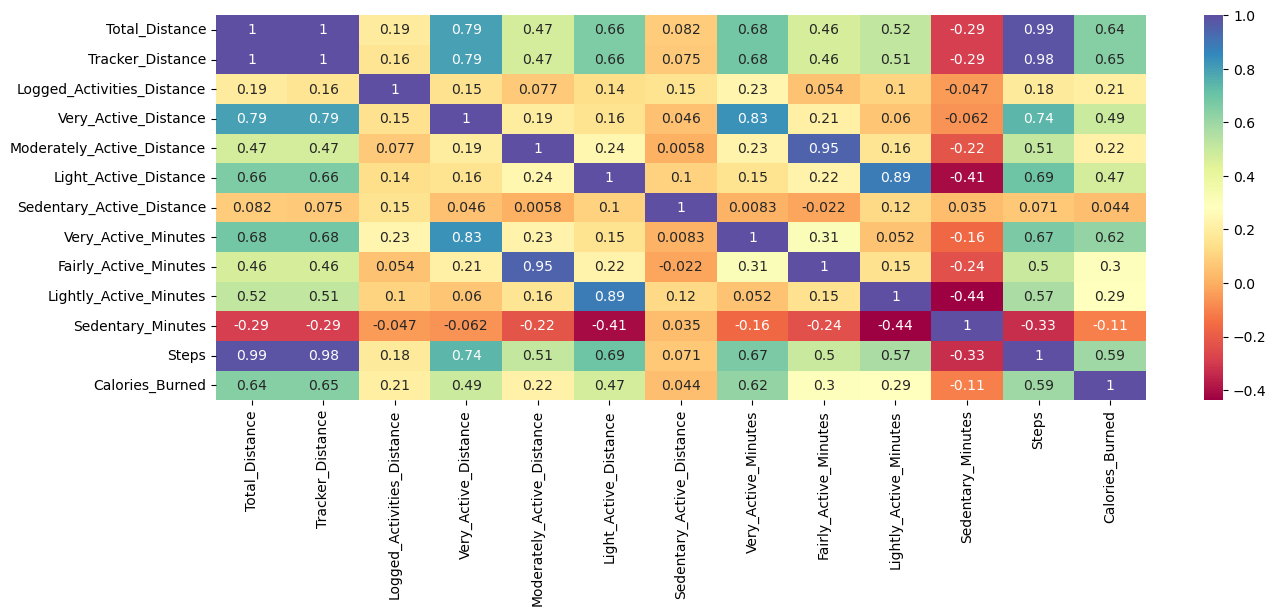

In [25]:
## Correlation Visualization 

#Create a copy of the original DataFrame
Fitnessdf_copy = Fitnessdf.copy()

#Drop the Class variable from df_copy
Fitnessdf_copy = Fitnessdf_copy.drop(columns=['Date','UserID'])

#Select only numeric columns
Fitnessdf_numeric = Fitnessdf_copy.select_dtypes(include=[float, int])

#Compute the correlation matrix
corr_matrix = Fitnessdf_numeric.corr()

#Visualization of Correlations
fig = plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Spectral")
plt.show()

In [32]:
#Define x and y variable
x = Fitnessdf_copy.drop(['Calories_Burned'],axis=1).to_numpy()
y = Fitnessdf_copy['Calories_Burned'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Model
from sklearn.linear_model import LinearRegression

In [28]:
#Create Standard Model - using Dummy Variables

from sklearn import metrics

for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    
    print('\nRegression Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         Fitnessdf_copy.drop(['Calories_Burned'],axis=1).columns,
                         columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Regression Model

Method: Linear regression

Intercept: 2285.27
                            Coefficients
Total_Distance               1281.337173
Tracker_Distance             1325.849547
Logged_Activities_Distance     32.719472
Very_Active_Distance         -764.257207
Moderately_Active_Distance   -287.083967
Light_Active_Distance          22.868239
Sedentary_Active_Distance     -14.241550
Very_Active_Minutes           577.136636
Fairly_Active_Minutes         237.897665
Lightly_Active_Minutes         10.209697
Sedentary_Minutes             100.184994
Steps                       -1934.444404

R2: 0.76
Adj_R2: 0.76
Mean Absolute Error: 273.40
Mean Squared Error: 114528.82
Root Mean Squared Error: 338.42
